In [1]:
import pandas as pd
import numpy as np

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


In [5]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten
from keras import Sequential

## CNN and using Padding as valid

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding = 'valid',input_shape = (28,28,1))) 
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation="softmax"))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 128)               1982592   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2002698 (7.64 MB)
Trainable params: 200269

## CNN using padding = Same

when we add padding as same then we are not lossing infromation as we addding rows and columns to the pictures to get same size feature map

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding = 'same',input_shape = (28,28,1))) 
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation="softmax"))


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3231498 (12.33 MB)
Trainable params: 323

## USing Strides of (2,2) as we are just getting major Features from the images

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding = 'same',strides=(2,2),input_shape = (28,28,1))) 
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same',strides=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', strides=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation="softmax"))


In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 85770 (335.04 KB)
Trainable params: 8577

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0731 - accuracy: 0.9775 - val_loss: 0.0585 - val_accuracy: 0.9794
Epoch 2/5
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0519 - accuracy: 0.9834 - val_loss: 0.0714 - val_accuracy: 0.9758
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0453 - accuracy: 0.9855 - val_loss: 0.0551 - val_accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0388 - accuracy: 0.9880 - val_loss: 0.0665 - val_accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.0689 - val_accuracy: 0.9800


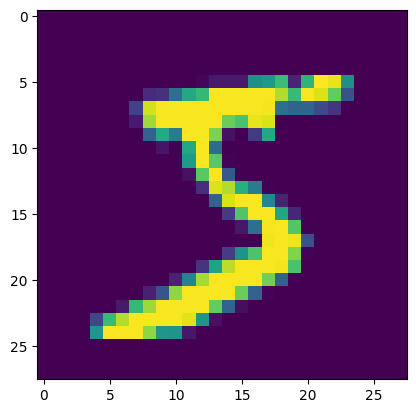

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [16]:
probability_y = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [18]:
y_test-probability_y.mean()

array([6.9, 1.9, 0.9, ..., 3.9, 4.9, 5.9], dtype=float32)

In [19]:
y_pred = probability_y.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.98

In [23]:
predict_image_1 = model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)
predict_image_1

1/1 [==============================] - 0s 25ms/step


array([7], dtype=int64)

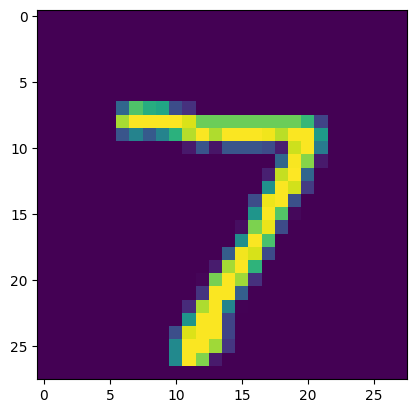

In [24]:
plt.imshow(x_test[0])